In [1]:
import numpy as np
import pandas as pd
import os
import sys
import random
sys.path.insert(0, './helpers')
from utils import makedir_if_not_exist

In [2]:
filtered_raw_data_dir = './data/filtered_raw_data/Visual'

In [3]:
subject_list = os.listdir(filtered_raw_data_dir)

In [4]:
subject_list

['sub_4.csv',
 'sub_41.csv',
 'sub_69.csv',
 'sub_3.csv',
 'sub_15.csv',
 'sub_52.csv',
 'sub_42.csv',
 'sub_38.csv',
 'sub_34.csv',
 'sub_66.csv',
 'sub_35.csv',
 'sub_24.csv',
 'sub_40.csv',
 'sub_26.csv',
 'sub_16.csv',
 'sub_80.csv',
 'sub_27.csv',
 'sub_73.csv',
 'sub_20.csv',
 'sub_12.csv',
 'sub_11.csv',
 'sub_67.csv',
 'sub_94.csv',
 'sub_44.csv',
 'sub_92.csv',
 'sub_75.csv',
 'sub_5.csv',
 'sub_59.csv',
 'sub_71.csv',
 'sub_28.csv',
 'sub_47.csv',
 'sub_85.csv',
 'sub_68.csv',
 'sub_55.csv',
 'sub_60.csv',
 'sub_91.csv',
 'sub_84.csv',
 'sub_21.csv',
 'sub_37.csv',
 'sub_56.csv',
 'sub_36.csv',
 'sub_10.csv',
 'sub_83.csv',
 'sub_93.csv',
 'sub_81.csv',
 'sub_29.csv',
 'sub_7.csv',
 'sub_74.csv',
 'sub_86.csv',
 'sub_25.csv',
 'sub_79.csv',
 'sub_76.csv',
 'sub_18.csv',
 'sub_48.csv',
 'sub_95.csv',
 'sub_1.csv',
 'sub_8.csv',
 'sub_61.csv',
 'sub_51.csv',
 'sub_70.csv',
 'sub_17.csv',
 'sub_64.csv',
 'sub_62.csv',
 'sub_49.csv',
 'sub_9.csv',
 'sub_72.csv',
 'sub_45.csv',
 '

### examine the raw data

In [5]:
sub1_csv = pd.read_csv(os.path.join(filtered_raw_data_dir, 'sub_1.csv'))

In [6]:
sub1_csv

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0    -0.391988  0.102213 -0.144544   0.067874  0.922934 -0.950422 -0.593880   
1    -0.382615 -0.057097 -0.175104   0.114353  0.952535 -0.833506 -0.627278   
2    -0.365132 -0.170312 -0.204929   0.141109  0.980433 -0.663717 -0.659263   
3    -0.341290 -0.224018 -0.232467   0.148572  1.013684 -0.477003 -0.690833   
4    -0.313940 -0.213330 -0.256733   0.138520  1.056980 -0.302307 -0.723017   
...        ...       ...       ...        ...       ...       ...       ...   
6811 -0.518479  1.545142  1.365885  -0.208794  1.803662  2.061447 -0.233521   
6812 -0.510845  1.240406  1.341304  -0.233776  1.792783  2.225033 -0.232582   
6813 -0.506492  0.990267  1.314688  -0.266548  1.747147  2.339044 -0.226712   
6814 -0.505872  0.820273  1.288278  -0.298923  1.672577  2.387901 -0.221419   
6815 -0.508713  0.746351  1.264142  -0.324731  1.578260  2.366688 -0.221906   

      CD_PHI_DO  label  
0      0.409303      0  
1      0.406690      0  
2      0.389148      0  
3      0.357877      0  
4      0.313223      0  
...         ...    ...  
6811   0.273081      2  
6812   0.256079      2  
6813   0.234415      2  
6814   0.212764      2  
6815   0.194899      2  

[6816 rows x 9 columns]

### sanitycheck: all subjects has same number of rows: 6816

In [7]:
for subject in subject_list:
    subject_csv = pd.read_csv(os.path.join(filtered_raw_data_dir, subject))
    assert subject_csv.shape[0] == 6816

In [8]:
sub1_csv[3408:]

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
3408 -0.365533  1.852988  0.557135  -0.602102  2.553252  1.350243 -0.639545   
3409 -0.398943  1.843387  0.541656  -0.579352  2.596253  1.601267 -0.639864   
3410 -0.417220  1.822478  0.529885  -0.552256  2.644982  1.803388 -0.641089   
3411 -0.418145  1.802999  0.522265  -0.530537  2.698622  1.953693 -0.643343   
3412 -0.401960  1.799316  0.519129  -0.520421  2.757946  2.058835 -0.647856   
...        ...       ...       ...        ...       ...       ...       ...   
6811 -0.518479  1.545142  1.365885  -0.208794  1.803662  2.061447 -0.233521   
6812 -0.510845  1.240406  1.341304  -0.233776  1.792783  2.225033 -0.232582   
6813 -0.506492  0.990267  1.314688  -0.266548  1.747147  2.339044 -0.226712   
6814 -0.505872  0.820273  1.288278  -0.298923  1.672577  2.387901 -0.221419   
6815 -0.508713  0.746351  1.264142  -0.324731  1.578260  2.366688 -0.221906   

      CD_PHI_DO  label  
3408  -0.637828      2  
3409  -0.775594      2  
3410  -0.866521      2  
3411  -0.903573      2  
3412  -0.887480      2  
...         ...    ...  
6811   0.273081      2  
6812   0.256079      2  
6813   0.234415      2  
6814   0.212764      2  
6815   0.194899      2  

[3408 rows x 9 columns]

In [9]:
sub1_test = sub1_csv[3408:].copy().reset_index(drop=True)

In [10]:
sub1_test

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0    -0.365533  1.852988  0.557135  -0.602102  2.553252  1.350243 -0.639545   
1    -0.398943  1.843387  0.541656  -0.579352  2.596253  1.601267 -0.639864   
2    -0.417220  1.822478  0.529885  -0.552256  2.644982  1.803388 -0.641089   
3    -0.418145  1.802999  0.522265  -0.530537  2.698622  1.953693 -0.643343   
4    -0.401960  1.799316  0.519129  -0.520421  2.757946  2.058835 -0.647856   
...        ...       ...       ...        ...       ...       ...       ...   
3403 -0.518479  1.545142  1.365885  -0.208794  1.803662  2.061447 -0.233521   
3404 -0.510845  1.240406  1.341304  -0.233776  1.792783  2.225033 -0.232582   
3405 -0.506492  0.990267  1.314688  -0.266548  1.747147  2.339044 -0.226712   
3406 -0.505872  0.820273  1.288278  -0.298923  1.672577  2.387901 -0.221419   
3407 -0.508713  0.746351  1.264142  -0.324731  1.578260  2.366688 -0.221906   

      CD_PHI_DO  label  
0     -0.637828      2  
1     -0.775594      2  
2     -0.866521      2  
3     -0.903573      2  
4     -0.887480      2  
...         ...    ...  
3403   0.273081      2  
3404   0.256079      2  
3405   0.234415      2  
3406   0.212764      2  
3407   0.194899      2  

[3408 rows x 9 columns]

### Process each subject's last 8 tasks as testset, into the format that for the same subject, different window size's data evaluate at the same point

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

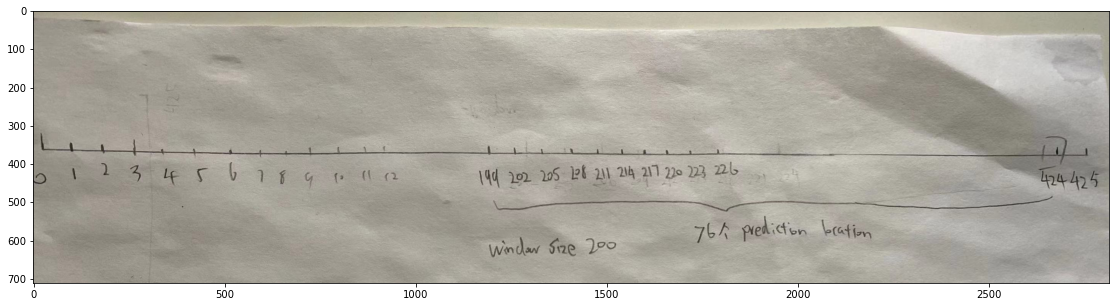

In [12]:
image = mpimg.imread('./SelectWindowSize.jpg')
plt.figure(figsize = (30,5))
plt.imshow(image)
plt.title('prediction on a ')
plt.show()

### process the slide window data (test set) and save to the designated folder 

In [5]:
SelectWindowSize_testset_rootdir = './data/UsedForSelectingWindowSize/Visual/'

In [14]:
# window_size = 10
# df_list = []
window_size_list = [10, 25, 50, 100, 150, 200]

for window_size in window_size_list:
    this_window_size_save_dir = os.path.join(SelectWindowSize_testset_rootdir, 'size_{}ts_stride_3ts/'.format(str(window_size)))
    makedir_if_not_exist(this_window_size_save_dir)

    for subject in subject_list:
        print('currently processing {} for subject: {}'.format(window_size, subject))
        this_subject_test_set = pd.read_csv(os.path.join(filtered_raw_data_dir, subject))[3408:].copy().reset_index(drop=True)
        print('shape this_subject_test_set:{}'.format(this_subject_test_set.shape))
        slide_window_data = None
        chunk_count = 0
        for task_id in range(0,8): #each subject's test set include 8 tasks, each task contains 426 rows
            this_subject_test_set_this_task = this_subject_test_set[int(426*task_id):int(426*(task_id+1))].copy().reset_index(drop=True)
            print('shape this_subject_test_set_this_task: {}'.format(this_subject_test_set_this_task.shape))
            for i in range(199-(window_size-1),424 - (window_size-1) + 1, 3): #for each task, the first evaluation timestep is row 199, the last evaluation timestep is row 424, stride3
                this_chunk = this_subject_test_set_this_task[i:i+window_size].copy()
                this_chunk['chunk'] = chunk_count
                chunk_count += 1 
                if slide_window_data is None:
                    slide_window_data = this_chunk
                else:
                    slide_window_data = pd.concat([slide_window_data, this_chunk], ignore_index=True)
        
        print('saving window size {} for subject: {}'.format(window_size, subject))
        slide_window_data.to_csv(os.path.join(this_window_size_save_dir, subject), index=False)
#         df_list.append(slide_window_data)



        print()

currently processing 10 for subject: sub_4.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_4.csv

currently processing 10 for subject: sub_41.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window s

shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_27.csv

currently processing 10 for subject: sub_73.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_73.csv

currently proc

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_68.csv

currently processing 10 for subject: sub_55.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_55.csv

currently processing 10 for subject: sub_60.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_86.csv

currently processing 10 for subject: sub_25.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_25.csv

currently processing 10 for subject: sub_79.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_9.csv

currently processing 10 for subject: sub_72.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_72.csv

currently processing 10 for subject: sub_45.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subj

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_32.csv

currently processing 10 for subject: sub_78.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 10 for subject: sub_78.csv

currently processing 10 for subject: sub_30.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_34.csv

currently processing 25 for subject: sub_66.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_66.csv

currently processing 25 for subject: sub_35.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_92.csv

currently processing 25 for subject: sub_75.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_75.csv

currently processing 25 for subject: sub_5.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subj

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_36.csv

currently processing 25 for subject: sub_10.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_10.csv

currently processing 25 for subject: sub_83.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_8.csv

currently processing 25 for subject: sub_61.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_61.csv

currently processing 25 for subject: sub_51.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subj

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_57.csv

currently processing 25 for subject: sub_82.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 25 for subject: sub_82.csv

currently processing 25 for subject: sub_53.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_4.csv

currently processing 50 for subject: sub_41.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_41.csv

currently processing 50 for subject: sub_69.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subj

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_27.csv

currently processing 50 for subject: sub_73.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_73.csv

currently processing 50 for subject: sub_20.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_68.csv

currently processing 50 for subject: sub_55.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_55.csv

currently processing 50 for subject: sub_60.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_86.csv

currently processing 50 for subject: sub_25.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_25.csv

currently processing 50 for subject: sub_79.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_9.csv

currently processing 50 for subject: sub_72.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_72.csv

currently processing 50 for subject: sub_45.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subj

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_32.csv

currently processing 50 for subject: sub_78.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 50 for subject: sub_78.csv

currently processing 50 for subject: sub_30.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_sub

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_34.csv

currently processing 100 for subject: sub_66.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_66.csv

currently processing 100 for subject: sub_35.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_92.csv

currently processing 100 for subject: sub_75.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_75.csv

currently processing 100 for subject: sub_5.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_36.csv

currently processing 100 for subject: sub_10.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_10.csv

currently processing 100 for subject: sub_83.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_8.csv

currently processing 100 for subject: sub_61.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_61.csv

currently processing 100 for subject: sub_51.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_57.csv

currently processing 100 for subject: sub_82.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 100 for subject: sub_82.csv

currently processing 100 for subject: sub_53.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_4.csv

currently processing 150 for subject: sub_41.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_41.csv

currently processing 150 for subject: sub_69.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_27.csv

currently processing 150 for subject: sub_73.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_73.csv

currently processing 150 for subject: sub_20.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_68.csv

currently processing 150 for subject: sub_55.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_55.csv

currently processing 150 for subject: sub_60.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_86.csv

currently processing 150 for subject: sub_25.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_25.csv

currently processing 150 for subject: sub_79.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_9.csv

currently processing 150 for subject: sub_72.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_72.csv

currently processing 150 for subject: sub_45.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_32.csv

currently processing 150 for subject: sub_78.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 150 for subject: sub_78.csv

currently processing 150 for subject: sub_30.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_34.csv

currently processing 200 for subject: sub_66.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_66.csv

currently processing 200 for subject: sub_35.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_92.csv

currently processing 200 for subject: sub_75.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_75.csv

currently processing 200 for subject: sub_5.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_36.csv

currently processing 200 for subject: sub_10.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_10.csv

currently processing 200 for subject: sub_83.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_8.csv

currently processing 200 for subject: sub_61.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_61.csv

currently processing 200 for subject: sub_51.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_

shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_57.csv

currently processing 200 for subject: sub_82.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
saving window size 200 for subject: sub_82.csv

currently processing 200 for subject: sub_53.csv
shape this_subject_test_set:(3408, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this_subject_test_set_this_task: (426, 9)
shape this

### Load the slide window data, and perform sanity check

In [2]:
SelectWindowSize_testset_rootdir = './data/UsedForSelectingWindowSize/Visual/'
window_size_10_dir = 'size_10ts_stride_3ts'
window_size_25_dir = 'size_25ts_stride_3ts'
window_size_50_dir = 'size_50ts_stride_3ts'
window_size_100_dir = 'size_100ts_stride_3ts'
window_size_150_dir = 'size_150ts_stride_3ts'
window_size_200_dir = 'size_200ts_stride_3ts'


In [3]:
window_size_10_subject_list = os.listdir(os.path.join(SelectWindowSize_testset_rootdir, window_size_10_dir))
window_size_25_subject_list = os.listdir(os.path.join(SelectWindowSize_testset_rootdir, window_size_25_dir))
window_size_50_subject_list = os.listdir(os.path.join(SelectWindowSize_testset_rootdir, window_size_50_dir))
window_size_100_subject_list = os.listdir(os.path.join(SelectWindowSize_testset_rootdir, window_size_100_dir))
window_size_150_subject_list = os.listdir(os.path.join(SelectWindowSize_testset_rootdir, window_size_150_dir))
window_size_200_subject_list = os.listdir(os.path.join(SelectWindowSize_testset_rootdir, window_size_200_dir))

#### 1. number of files for each window size same: 88

In [4]:
print('#files window size 10: {}'.format(len(window_size_10_subject_list)))
print('#files window size 25: {}'.format(len(window_size_25_subject_list)))
print('#files window size 50: {}'.format(len(window_size_50_subject_list)))
print('#files window size 100: {}'.format(len(window_size_100_subject_list)))
print('#files window size 150: {}'.format(len(window_size_150_subject_list)))
print('#files window size 200: {}'.format(len(window_size_200_subject_list)))

#files window size 10: 88
#files window size 25: 88
#files window size 50: 88
#files window size 100: 88
#files window size 150: 88
#files window size 200: 88


#### 2. examine the dataframe for each window size

In [5]:
### window_size10

In [6]:
window_size_10_subject = random.choice(window_size_10_subject_list)
print('window_size_10_subject to examine: {}'.format(window_size_10_subject))

window_size_10_subject to examine: sub_53.csv


In [7]:
df_window_size_10_subject = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_10_dir, window_size_10_subject))
df_window_size_10_subject

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0     0.916520 -0.066505 -1.423122   0.433111  1.090571 -1.340577 -1.199927   
1     0.924529  0.073369 -1.416131   0.328519  1.120599 -1.359251 -1.213844   
2     0.929452  0.218331 -1.406764   0.229902  1.146349 -1.281167 -1.229369   
3     0.931043  0.337684 -1.395828   0.152309  1.164875 -1.112249 -1.244717   
4     0.930181  0.404277 -1.384385   0.107544  1.175081 -0.868008 -1.258069   
...        ...       ...       ...        ...       ...       ...       ...   
6075 -3.713730  0.271724 -2.380726   0.851482 -1.307514 -0.154483 -2.535183   
6076 -3.717531  0.453785 -2.358859   0.872619 -1.335453 -0.107820 -2.531243   
6077 -3.715402  0.651458 -2.342927   0.869718 -1.363652 -0.072539 -2.530445   
6078 -3.703804  0.851393 -2.333432   0.840752 -1.393324 -0.058989 -2.535381   
6079 -3.680264  1.048764 -2.330237   0.787242 -1.425001 -0.075118 -2.546968   

      CD_PHI_DO  label  chunk  
0      0.344841      2      0  
1      0.381671      2      0  
2      0.419329      2      0  
3      0.451189      2      0  
4      0.471039      2      0  
...         ...    ...    ...  
6075   1.873034      2    607  
6076   1.838283      2    607  
6077   1.810887      2    607  
6078   1.794223      2    607  
6079   1.788737      2    607  

[6080 rows x 10 columns]

In [8]:
window_size_10_chunk_value_standard = df_window_size_10_subject.chunk.values
window_size_10_label_value_standard = df_window_size_10_subject.label.values

In [10]:
#check every subject has 6080 rows, 608 chunks
for sub in window_size_10_subject_list:
    
    sub_df = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_10_dir, sub))
    
    num_rows = sub_df.shape[0]
    num_chunks = max(sub_df.chunk.values) + 1
    sub_chunk_values = sub_df.chunk.values
    sub_label_values = sub_df.label.values
    print('sub: {}, {}, {}'.format(sub, num_rows, num_chunks))
    
    assert num_rows == 6080
    assert num_chunks == 608
    assert np.array_equal(sub_chunk_values, window_size_10_chunk_value_standard)
    assert np.array_equal(sub_label_values, window_size_10_label_value_standard)
    


sub: sub_4.csv, 6080, 608
sub: sub_41.csv, 6080, 608
sub: sub_69.csv, 6080, 608
sub: sub_3.csv, 6080, 608
sub: sub_15.csv, 6080, 608
sub: sub_52.csv, 6080, 608
sub: sub_42.csv, 6080, 608
sub: sub_38.csv, 6080, 608
sub: sub_34.csv, 6080, 608
sub: sub_66.csv, 6080, 608
sub: sub_35.csv, 6080, 608
sub: sub_24.csv, 6080, 608
sub: sub_40.csv, 6080, 608
sub: sub_26.csv, 6080, 608
sub: sub_16.csv, 6080, 608
sub: sub_80.csv, 6080, 608
sub: sub_27.csv, 6080, 608
sub: sub_73.csv, 6080, 608
sub: sub_20.csv, 6080, 608
sub: sub_12.csv, 6080, 608
sub: sub_11.csv, 6080, 608
sub: sub_67.csv, 6080, 608
sub: sub_94.csv, 6080, 608
sub: sub_44.csv, 6080, 608
sub: sub_92.csv, 6080, 608
sub: sub_75.csv, 6080, 608
sub: sub_5.csv, 6080, 608
sub: sub_59.csv, 6080, 608
sub: sub_71.csv, 6080, 608
sub: sub_28.csv, 6080, 608
sub: sub_47.csv, 6080, 608
sub: sub_85.csv, 6080, 608
sub: sub_68.csv, 6080, 608
sub: sub_55.csv, 6080, 608
sub: sub_60.csv, 6080, 608
sub: sub_91.csv, 6080, 608
sub: sub_84.csv, 6080, 608
sub:

In [11]:
### window_size25

In [12]:
window_size_25_subject = random.choice(window_size_25_subject_list)
print('window_size_25_subject to examine: {}'.format(window_size_25_subject))

window_size_25_subject to examine: sub_70.csv


In [13]:
df_window_size_25_subject = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_25_dir, window_size_25_subject))
df_window_size_25_subject

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0      0.399130  0.392384 -1.066350  -0.508191  1.384529  0.725888 -0.865856   
1      0.390771  0.553919 -1.046002  -0.506549  1.373019  0.861319 -0.852867   
2      0.383721  0.603759 -1.025390  -0.472427  1.359037  1.037280 -0.840878   
3      0.375960  0.519486 -1.007339  -0.401158  1.343668  1.255845 -0.830703   
4      0.366272  0.304705 -0.994070  -0.297120  1.329254  1.508093 -0.823512   
...         ...       ...       ...        ...       ...       ...       ...   
15195 -0.184526 -0.634878 -1.011776  -0.556787  1.908627  0.716319 -1.536098   
15196 -0.166340 -0.395889 -1.041439  -0.598451  1.980461  1.178356 -1.574559   
15197 -0.151484 -0.184006 -1.071024  -0.638106  2.042887  1.636687 -1.602502   
15198 -0.135443 -0.011520 -1.098967  -0.675622  2.096654  2.053062 -1.620144   
15199 -0.112676  0.116506 -1.124366  -0.708473  2.143155  2.387059 -1.629346   

       CD_PHI_DO  label  chunk  
0      -0.722500      2      0  
1      -0.737063      2      0  
2      -0.727925      2      0  
3      -0.703636      2      0  
4      -0.670294      2      0  
...          ...    ...    ...  
15195  -0.788384      2    607  
15196  -0.946431      2    607  
15197  -1.110719      2    607  
15198  -1.263335      2    607  
15199  -1.385290      2    607  

[15200 rows x 10 columns]

In [14]:
window_size_25_chunk_value_standard = df_window_size_25_subject.chunk.values
window_size_25_label_value_standard = df_window_size_25_subject.label.values

In [16]:
#check every subject has 15200 rows, 608 chunks
for sub in window_size_25_subject_list:
    
    sub_df = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_25_dir, sub))
    
    num_rows = sub_df.shape[0]
    num_chunks = max(sub_df.chunk.values) + 1
    sub_chunk_values = sub_df.chunk.values
    sub_label_values = sub_df.label.values
    print('sub: {}, {}, {}'.format(sub, num_rows, num_chunks))
    
    assert num_rows == 15200
    assert num_chunks == 608
    assert np.array_equal(sub_chunk_values, window_size_25_chunk_value_standard)
    assert np.array_equal(sub_label_values, window_size_25_label_value_standard)
    


sub: sub_4.csv, 15200, 608
sub: sub_41.csv, 15200, 608
sub: sub_69.csv, 15200, 608
sub: sub_3.csv, 15200, 608
sub: sub_15.csv, 15200, 608
sub: sub_52.csv, 15200, 608
sub: sub_42.csv, 15200, 608
sub: sub_38.csv, 15200, 608
sub: sub_34.csv, 15200, 608
sub: sub_66.csv, 15200, 608
sub: sub_35.csv, 15200, 608
sub: sub_24.csv, 15200, 608
sub: sub_40.csv, 15200, 608
sub: sub_26.csv, 15200, 608
sub: sub_16.csv, 15200, 608
sub: sub_80.csv, 15200, 608
sub: sub_27.csv, 15200, 608
sub: sub_73.csv, 15200, 608
sub: sub_20.csv, 15200, 608
sub: sub_12.csv, 15200, 608
sub: sub_11.csv, 15200, 608
sub: sub_67.csv, 15200, 608
sub: sub_94.csv, 15200, 608
sub: sub_44.csv, 15200, 608
sub: sub_92.csv, 15200, 608
sub: sub_75.csv, 15200, 608
sub: sub_5.csv, 15200, 608
sub: sub_59.csv, 15200, 608
sub: sub_71.csv, 15200, 608
sub: sub_28.csv, 15200, 608
sub: sub_47.csv, 15200, 608
sub: sub_85.csv, 15200, 608
sub: sub_68.csv, 15200, 608
sub: sub_55.csv, 15200, 608
sub: sub_60.csv, 15200, 608
sub: sub_91.csv, 15200,

In [17]:
### window_size50

In [18]:
window_size_50_subject = random.choice(window_size_50_subject_list)
print('window_size_50_subject to examine: {}'.format(window_size_50_subject))

window_size_50_subject to examine: sub_5.csv


In [19]:
df_window_size_50_subject = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_50_dir, window_size_50_subject))
df_window_size_50_subject

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0      2.135147  2.634820 -0.373956  -0.821711  5.182301  3.081691 -1.044959   
1      2.087965  2.572546 -0.360154  -0.790434  5.213572  3.042800 -1.054176   
2      2.051133  2.482037 -0.352579  -0.742403  5.248387  2.947304 -1.065869   
3      2.028618  2.374353 -0.353001  -0.685324  5.284612  2.802874 -1.079828   
4      2.022320  2.257701 -0.362141  -0.626359  5.320568  2.624915 -1.095622   
...         ...       ...       ...        ...       ...       ...       ...   
30395  2.154803  2.708382 -0.306756  -0.805556  5.014408  3.287785 -1.042810   
30396  2.145534  2.715154 -0.311438  -0.778720  5.020078  3.283697 -1.051901   
30397  2.148108  2.717914 -0.319789  -0.744573  5.028095  3.287444 -1.061854   
30398  2.165013  2.723241 -0.331410  -0.706510  5.038671  3.283166 -1.070728   
30399  2.197406  2.737432 -0.345586  -0.669376  5.051422  3.249144 -1.076822   

       CD_PHI_DO  label  chunk  
0      -0.965573      2      0  
1      -0.890505      2      0  
2      -0.817201      2      0  
3      -0.753692      2      0  
4      -0.705405      2      0  
...          ...    ...    ...  
30395  -0.760714      2    607  
30396  -0.707353      2    607  
30397  -0.640781      2    607  
30398  -0.565878      2    607  
30399  -0.490254      2    607  

[30400 rows x 10 columns]

In [20]:
window_size_50_chunk_value_standard = df_window_size_50_subject.chunk.values
window_size_50_label_value_standard = df_window_size_50_subject.label.values

In [21]:
#check every subject has 30400 rows, 608 chunks
for sub in window_size_50_subject_list:
    
    sub_df = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_50_dir, sub))
    
    num_rows = sub_df.shape[0]
    num_chunks = max(sub_df.chunk.values) + 1
    sub_chunk_values = sub_df.chunk.values
    sub_label_values = sub_df.label.values
    print('sub: {}, {}, {}'.format(sub, num_rows, num_chunks))
    
    assert num_rows == 30400
    assert num_chunks == 608
    assert np.array_equal(sub_chunk_values, window_size_50_chunk_value_standard)
    assert np.array_equal(sub_label_values, window_size_50_label_value_standard)
    


sub: sub_4.csv, 30400, 608
sub: sub_41.csv, 30400, 608
sub: sub_69.csv, 30400, 608
sub: sub_3.csv, 30400, 608
sub: sub_15.csv, 30400, 608
sub: sub_52.csv, 30400, 608
sub: sub_42.csv, 30400, 608
sub: sub_38.csv, 30400, 608
sub: sub_34.csv, 30400, 608
sub: sub_66.csv, 30400, 608
sub: sub_35.csv, 30400, 608
sub: sub_24.csv, 30400, 608
sub: sub_40.csv, 30400, 608
sub: sub_26.csv, 30400, 608
sub: sub_16.csv, 30400, 608
sub: sub_80.csv, 30400, 608
sub: sub_27.csv, 30400, 608
sub: sub_73.csv, 30400, 608
sub: sub_20.csv, 30400, 608
sub: sub_12.csv, 30400, 608
sub: sub_11.csv, 30400, 608
sub: sub_67.csv, 30400, 608
sub: sub_94.csv, 30400, 608
sub: sub_44.csv, 30400, 608
sub: sub_92.csv, 30400, 608
sub: sub_75.csv, 30400, 608
sub: sub_5.csv, 30400, 608
sub: sub_59.csv, 30400, 608
sub: sub_71.csv, 30400, 608
sub: sub_28.csv, 30400, 608
sub: sub_47.csv, 30400, 608
sub: sub_85.csv, 30400, 608
sub: sub_68.csv, 30400, 608
sub: sub_55.csv, 30400, 608
sub: sub_60.csv, 30400, 608
sub: sub_91.csv, 30400,

In [22]:
### window_size100

In [23]:
window_size_100_subject = random.choice(window_size_100_subject_list)
print('window_size_100_subject to examine: {}'.format(window_size_100_subject))

window_size_100_subject to examine: sub_13.csv


In [24]:
df_window_size_100_subject = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_100_dir, window_size_100_subject))
df_window_size_100_subject

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0      2.133003  0.704430  0.661963  -0.255191  0.205885 -1.945813  0.682563   
1      2.125699  0.821686  0.659243  -0.359742  0.045008 -1.857740  0.713361   
2      2.121202  0.926139  0.654996  -0.460299 -0.020012 -1.350401  0.718369   
3      2.120337  1.007727  0.648978  -0.547170  0.028712 -0.503965  0.692855   
4      2.124401  1.063735  0.641056  -0.611124  0.191161  0.552830  0.637595   
...         ...       ...       ...        ...       ...       ...       ...   
60795  4.160504  1.242763  0.572131  -0.728723  0.599263  2.297827  0.595950   
60796  4.165416  1.235330  0.571114  -0.745522  0.490434  1.809077  0.610389   
60797  4.155233  1.120907  0.571985  -0.712540  0.384341  0.992046  0.610643   
60798  4.133025  0.909637  0.572954  -0.634181  0.296225 -0.077817  0.597975   
60799  4.103574  0.630755  0.572373  -0.524248  0.239908 -1.293748  0.575303   

       CD_PHI_DO  label  chunk  
0       3.127038      2      0  
1       2.879466      2      0  
2       2.466843      2      0  
3       1.953076      2      0  
4       1.418832      2      0  
...          ...    ...    ...  
60795   0.648358      2    607  
60796   0.519467      2    607  
60797   0.506922      2    607  
60798   0.611158      2    607  
60799   0.816368      2    607  

[60800 rows x 10 columns]

In [25]:
window_size_100_chunk_value_standard = df_window_size_100_subject.chunk.values
window_size_100_label_value_standard = df_window_size_100_subject.label.values

In [26]:
#check every subject has 60800 rows, 608 chunks
for sub in window_size_100_subject_list:
    
    sub_df = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_100_dir, sub))
    
    num_rows = sub_df.shape[0]
    num_chunks = max(sub_df.chunk.values) + 1
    sub_chunk_values = sub_df.chunk.values
    sub_label_values = sub_df.label.values
    print('sub: {}, {}, {}'.format(sub, num_rows, num_chunks))
    
    assert num_rows == 60800
    assert num_chunks == 608
    assert np.array_equal(sub_chunk_values, window_size_100_chunk_value_standard)
    assert np.array_equal(sub_label_values, window_size_100_label_value_standard)
    


sub: sub_4.csv, 60800, 608
sub: sub_41.csv, 60800, 608
sub: sub_69.csv, 60800, 608
sub: sub_3.csv, 60800, 608
sub: sub_15.csv, 60800, 608
sub: sub_52.csv, 60800, 608
sub: sub_42.csv, 60800, 608
sub: sub_38.csv, 60800, 608
sub: sub_34.csv, 60800, 608
sub: sub_66.csv, 60800, 608
sub: sub_35.csv, 60800, 608
sub: sub_24.csv, 60800, 608
sub: sub_40.csv, 60800, 608
sub: sub_26.csv, 60800, 608
sub: sub_16.csv, 60800, 608
sub: sub_80.csv, 60800, 608
sub: sub_27.csv, 60800, 608
sub: sub_73.csv, 60800, 608
sub: sub_20.csv, 60800, 608
sub: sub_12.csv, 60800, 608
sub: sub_11.csv, 60800, 608
sub: sub_67.csv, 60800, 608
sub: sub_94.csv, 60800, 608
sub: sub_44.csv, 60800, 608
sub: sub_92.csv, 60800, 608
sub: sub_75.csv, 60800, 608
sub: sub_5.csv, 60800, 608
sub: sub_59.csv, 60800, 608
sub: sub_71.csv, 60800, 608
sub: sub_28.csv, 60800, 608
sub: sub_47.csv, 60800, 608
sub: sub_85.csv, 60800, 608
sub: sub_68.csv, 60800, 608
sub: sub_55.csv, 60800, 608
sub: sub_60.csv, 60800, 608
sub: sub_91.csv, 60800,

In [27]:
### window_size150

In [28]:
window_size_150_subject = random.choice(window_size_150_subject_list)
print('window_size_150_subject to examine: {}'.format(window_size_150_subject))

window_size_150_subject to examine: sub_95.csv


In [29]:
df_window_size_150_subject = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_150_dir, window_size_150_subject))
df_window_size_150_subject

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0      1.611089  0.769654  0.580837  -0.320162  0.384679  0.057942 -0.641287   
1      1.659827  0.612014  0.577595  -0.289274  0.372967  0.170183 -0.628108   
2      1.704300  0.452891  0.571769  -0.257385  0.370646  0.261264 -0.620125   
3      1.736567  0.319590  0.565959  -0.228990  0.377573  0.322553 -0.617128   
4      1.750603  0.239197  0.562741  -0.207288  0.392405  0.350460 -0.618279   
...         ...       ...       ...        ...       ...       ...       ...   
91195  3.730500  2.307829  0.561069  -0.496922  0.491683 -0.491497 -1.032468   
91196  3.744369  2.385159  0.562185  -0.500162  0.486878 -0.261285 -1.024581   
91197  3.750029  2.413045  0.559068  -0.489105  0.497470 -0.043194 -1.018774   
91198  3.747626  2.394073  0.551824  -0.464189  0.522212  0.124406 -1.015419   
91199  3.738989  2.339328  0.541112  -0.431403  0.557779  0.217567 -1.014276   

       CD_PHI_DO  label  chunk  
0      -0.563935      2      0  
1      -0.612233      2      0  
2      -0.647147      2      0  
3      -0.668398      2      0  
4      -0.675375      2      0  
...          ...    ...    ...  
91195   0.092243      2    607  
91196  -0.108427      2    607  
91197  -0.315466      2    607  
91198  -0.500160      2    607  
91199  -0.637169      2    607  

[91200 rows x 10 columns]

In [30]:
window_size_150_chunk_value_standard = df_window_size_150_subject.chunk.values
window_size_150_label_value_standard = df_window_size_150_subject.label.values

In [31]:
#check every subject has 91200 rows, 608 chunks
for sub in window_size_150_subject_list:
    
    sub_df = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_150_dir, sub))
    
    num_rows = sub_df.shape[0]
    num_chunks = max(sub_df.chunk.values) + 1
    sub_chunk_values = sub_df.chunk.values
    sub_label_values = sub_df.label.values
    print('sub: {}, {}, {}'.format(sub, num_rows, num_chunks))
    
    assert num_rows == 91200
    assert num_chunks == 608
    assert np.array_equal(sub_chunk_values, window_size_150_chunk_value_standard)
    assert np.array_equal(sub_label_values, window_size_150_label_value_standard)
    


sub: sub_4.csv, 91200, 608
sub: sub_41.csv, 91200, 608
sub: sub_69.csv, 91200, 608
sub: sub_3.csv, 91200, 608
sub: sub_15.csv, 91200, 608
sub: sub_52.csv, 91200, 608
sub: sub_42.csv, 91200, 608
sub: sub_38.csv, 91200, 608
sub: sub_34.csv, 91200, 608
sub: sub_66.csv, 91200, 608
sub: sub_35.csv, 91200, 608
sub: sub_24.csv, 91200, 608
sub: sub_40.csv, 91200, 608
sub: sub_26.csv, 91200, 608
sub: sub_16.csv, 91200, 608
sub: sub_80.csv, 91200, 608
sub: sub_27.csv, 91200, 608
sub: sub_73.csv, 91200, 608
sub: sub_20.csv, 91200, 608
sub: sub_12.csv, 91200, 608
sub: sub_11.csv, 91200, 608
sub: sub_67.csv, 91200, 608
sub: sub_94.csv, 91200, 608
sub: sub_44.csv, 91200, 608
sub: sub_92.csv, 91200, 608
sub: sub_75.csv, 91200, 608
sub: sub_5.csv, 91200, 608
sub: sub_59.csv, 91200, 608
sub: sub_71.csv, 91200, 608
sub: sub_28.csv, 91200, 608
sub: sub_47.csv, 91200, 608
sub: sub_85.csv, 91200, 608
sub: sub_68.csv, 91200, 608
sub: sub_55.csv, 91200, 608
sub: sub_60.csv, 91200, 608
sub: sub_91.csv, 91200,

In [32]:
### window_size200

In [33]:
window_size_200_subject = random.choice(window_size_200_subject_list)
print('window_size_200_subject to examine: {}'.format(window_size_200_subject))

window_size_200_subject to examine: sub_35.csv


In [34]:
df_window_size_200_subject = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_200_dir, window_size_200_subject))
df_window_size_200_subject

AB_I_O  AB_PHI_O   AB_I_DO  AB_PHI_DO    CD_I_O  CD_PHI_O   CD_I_DO  \
0      -0.858307 -0.112418  0.157564   0.379393 -0.043357 -0.596553  0.225670   
1      -0.850647 -0.167242  0.149395   0.369316  0.018030 -0.355933  0.194630   
2      -0.840881 -0.280344  0.137684   0.365412  0.073206 -0.101056  0.160390   
3      -0.826937 -0.430935  0.122385   0.362886  0.117312  0.135715  0.125583   
4      -0.807746 -0.592733  0.103726   0.356502  0.147994  0.324197  0.092278   
...          ...       ...       ...        ...       ...       ...       ...   
121595  0.073423  0.346478 -0.258543   0.374029  1.458970  1.452328 -0.626687   
121596  0.105411  0.308740 -0.272672   0.387011  1.482224  1.482658 -0.638059   
121597  0.133686  0.286076 -0.282300   0.391494  1.484645  1.367139 -0.644781   
121598  0.154559  0.290136 -0.286282   0.391660  1.467824  1.130992 -0.645994   
121599  0.166054  0.323754 -0.284564   0.392759  1.436489  0.817411 -0.642018   

        CD_PHI_DO  label  chunk  
0        0.179164      2      0  
1        0.122624      2      0  
2        0.057881      2      0  
3       -0.006344      2      0  
4       -0.063591      2      0  
...           ...    ...    ...  
121595  -0.844701      2    607  
121596  -0.916222      2    607  
121597  -0.940984      2    607  
121598  -0.918569      2    607  
121599  -0.855440      2    607  

[121600 rows x 10 columns]

In [35]:
window_size_200_chunk_value_standard = df_window_size_200_subject.chunk.values
window_size_200_label_value_standard = df_window_size_200_subject.label.values

In [36]:
#check every subject has 121600 rows, 608 chunks
for sub in window_size_200_subject_list:
    
    sub_df = pd.read_csv(os.path.join(SelectWindowSize_testset_rootdir, window_size_200_dir, sub))
    
    num_rows = sub_df.shape[0]
    num_chunks = max(sub_df.chunk.values) + 1
    sub_chunk_values = sub_df.chunk.values
    sub_label_values = sub_df.label.values
    print('sub: {}, {}, {}'.format(sub, num_rows, num_chunks))
    
    assert num_rows == 121600
    assert num_chunks == 608
    assert np.array_equal(sub_chunk_values, window_size_200_chunk_value_standard)
    assert np.array_equal(sub_label_values, window_size_200_label_value_standard)
    


sub: sub_4.csv, 121600, 608
sub: sub_41.csv, 121600, 608
sub: sub_69.csv, 121600, 608
sub: sub_3.csv, 121600, 608
sub: sub_15.csv, 121600, 608
sub: sub_52.csv, 121600, 608
sub: sub_42.csv, 121600, 608
sub: sub_38.csv, 121600, 608
sub: sub_34.csv, 121600, 608
sub: sub_66.csv, 121600, 608
sub: sub_35.csv, 121600, 608
sub: sub_24.csv, 121600, 608
sub: sub_40.csv, 121600, 608
sub: sub_26.csv, 121600, 608
sub: sub_16.csv, 121600, 608
sub: sub_80.csv, 121600, 608
sub: sub_27.csv, 121600, 608
sub: sub_73.csv, 121600, 608
sub: sub_20.csv, 121600, 608
sub: sub_12.csv, 121600, 608
sub: sub_11.csv, 121600, 608
sub: sub_67.csv, 121600, 608
sub: sub_94.csv, 121600, 608
sub: sub_44.csv, 121600, 608
sub: sub_92.csv, 121600, 608
sub: sub_75.csv, 121600, 608
sub: sub_5.csv, 121600, 608
sub: sub_59.csv, 121600, 608
sub: sub_71.csv, 121600, 608
sub: sub_28.csv, 121600, 608
sub: sub_47.csv, 121600, 608
sub: sub_85.csv, 121600, 608
sub: sub_68.csv, 121600, 608
sub: sub_55.csv, 121600, 608
sub: sub_60.csv, 

556.0

### 5-fold cross validation index setting

In [2]:
import brain_data
from sklearn.model_selection import KFold


### binary_class

### size_2sec_10ts_stride_3ts

In [3]:
data_dir = './data/Leon/Visual/size_2sec_10ts_stride_3ts/'
num_chunk_this_window_size = 1216
sub_file = 'sub_1.csv'

In [4]:
sub_feature_array, sub_label_array = brain_data.read_subject_csv_binary(os.path.join(data_dir, sub_file))

sub_data_len = len(sub_label_array)
half_sub_data_len = int(sub_data_len/2)
print('half_sub_data_len: {}'.format(half_sub_data_len), flush=True)
sub_train_feature_array = sub_feature_array[:half_sub_data_len]
sub_train_label_array = sub_label_array[:half_sub_data_len]

current chunk: 0
label_for_this_segment is 0
current chunk: 1
label_for_this_segment is 0
current chunk: 2
label_for_this_segment is 0
current chunk: 3
label_for_this_segment is 0
current chunk: 4
label_for_this_segment is 0
current chunk: 5
label_for_this_segment is 0
current chunk: 6
label_for_this_segment is 0
current chunk: 7
label_for_this_segment is 0
current chunk: 8
label_for_this_segment is 0
current chunk: 9
label_for_this_segment is 0
current chunk: 10
label_for_this_segment is 0
current chunk: 11
label_for_this_segment is 0
current chunk: 12
label_for_this_segment is 0
current chunk: 13
label_for_this_segment is 0
current chunk: 14
label_for_this_segment is 0
current chunk: 15
label_for_this_segment is 0
current chunk: 16
label_for_this_segment is 0
current chunk: 17
label_for_this_segment is 0
current chunk: 18
label_for_this_segment is 0
current chunk: 19
label_for_this_segment is 0
current chunk: 20
label_for_this_segment is 0
current chunk: 21
label_for_this_segment is 

current chunk: 234
current chunk: 235
current chunk: 236
current chunk: 237
current chunk: 238
current chunk: 239
current chunk: 240
current chunk: 241
current chunk: 242
current chunk: 243
current chunk: 244
current chunk: 245
current chunk: 246
current chunk: 247
current chunk: 248
current chunk: 249
current chunk: 250
current chunk: 251
current chunk: 252
current chunk: 253
current chunk: 254
current chunk: 255
current chunk: 256
current chunk: 257
current chunk: 258
current chunk: 259
current chunk: 260
current chunk: 261
current chunk: 262
current chunk: 263
current chunk: 264
current chunk: 265
current chunk: 266
current chunk: 267
current chunk: 268
current chunk: 269
current chunk: 270
current chunk: 271
current chunk: 272
current chunk: 273
current chunk: 274
current chunk: 275
current chunk: 276
current chunk: 277
current chunk: 278
label_for_this_segment is 2, map to class1
current chunk: 279
label_for_this_segment is 2, map to class1
current chunk: 280
label_for_this_segmen

current chunk: 397
label_for_this_segment is 2, map to class1
current chunk: 398
label_for_this_segment is 2, map to class1
current chunk: 399
label_for_this_segment is 2, map to class1
current chunk: 400
label_for_this_segment is 2, map to class1
current chunk: 401
label_for_this_segment is 2, map to class1
current chunk: 402
label_for_this_segment is 2, map to class1
current chunk: 403
label_for_this_segment is 2, map to class1
current chunk: 404
label_for_this_segment is 2, map to class1
current chunk: 405
label_for_this_segment is 2, map to class1
current chunk: 406
label_for_this_segment is 2, map to class1
current chunk: 407
label_for_this_segment is 2, map to class1
current chunk: 408
label_for_this_segment is 2, map to class1
current chunk: 409
label_for_this_segment is 2, map to class1
current chunk: 410
label_for_this_segment is 2, map to class1
current chunk: 411
label_for_this_segment is 2, map to class1
current chunk: 412
label_for_this_segment is 2, map to class1
current 

current chunk: 722
label_for_this_segment is 2, map to class1
current chunk: 723
label_for_this_segment is 2, map to class1
current chunk: 724
label_for_this_segment is 2, map to class1
current chunk: 725
label_for_this_segment is 2, map to class1
current chunk: 726
label_for_this_segment is 2, map to class1
current chunk: 727
label_for_this_segment is 2, map to class1
current chunk: 728
label_for_this_segment is 2, map to class1
current chunk: 729
label_for_this_segment is 2, map to class1
current chunk: 730
label_for_this_segment is 2, map to class1
current chunk: 731
label_for_this_segment is 2, map to class1
current chunk: 732
label_for_this_segment is 2, map to class1
current chunk: 733
label_for_this_segment is 2, map to class1
current chunk: 734
label_for_this_segment is 2, map to class1
current chunk: 735
label_for_this_segment is 2, map to class1
current chunk: 736
label_for_this_segment is 2, map to class1
current chunk: 737
label_for_this_segment is 2, map to class1
current 

current chunk: 1115
label_for_this_segment is 2, map to class1
current chunk: 1116
label_for_this_segment is 2, map to class1
current chunk: 1117
label_for_this_segment is 2, map to class1
current chunk: 1118
label_for_this_segment is 2, map to class1
current chunk: 1119
label_for_this_segment is 2, map to class1
current chunk: 1120
label_for_this_segment is 2, map to class1
current chunk: 1121
label_for_this_segment is 2, map to class1
current chunk: 1122
label_for_this_segment is 2, map to class1
current chunk: 1123
label_for_this_segment is 2, map to class1
current chunk: 1124
label_for_this_segment is 2, map to class1
current chunk: 1125
label_for_this_segment is 2, map to class1
current chunk: 1126
label_for_this_segment is 2, map to class1
current chunk: 1127
label_for_this_segment is 2, map to class1
current chunk: 1128
label_for_this_segment is 2, map to class1
current chunk: 1129
label_for_this_segment is 2, map to class1
current chunk: 1130
label_for_this_segment is 2, map to

current chunk: 1246
label_for_this_segment is 2, map to class1
current chunk: 1247
label_for_this_segment is 2, map to class1
current chunk: 1248
label_for_this_segment is 2, map to class1
current chunk: 1249
label_for_this_segment is 2, map to class1
current chunk: 1250
label_for_this_segment is 2, map to class1
current chunk: 1251
current chunk: 1252
current chunk: 1253
current chunk: 1254
current chunk: 1255
current chunk: 1256
current chunk: 1257
current chunk: 1258
current chunk: 1259
current chunk: 1260
current chunk: 1261
current chunk: 1262
current chunk: 1263
current chunk: 1264
current chunk: 1265
current chunk: 1266
current chunk: 1267
current chunk: 1268
current chunk: 1269
current chunk: 1270
current chunk: 1271
current chunk: 1272
current chunk: 1273
current chunk: 1274
current chunk: 1275
current chunk: 1276
current chunk: 1277
current chunk: 1278
current chunk: 1279
current chunk: 1280
current chunk: 1281
current chunk: 1282
current chunk: 1283
current chunk: 1284
curre

current chunk: 1497
label_for_this_segment is 0
current chunk: 1498
label_for_this_segment is 0
current chunk: 1499
label_for_this_segment is 0
current chunk: 1500
label_for_this_segment is 0
current chunk: 1501
label_for_this_segment is 0
current chunk: 1502
label_for_this_segment is 0
current chunk: 1503
label_for_this_segment is 0
current chunk: 1504
label_for_this_segment is 0
current chunk: 1505
label_for_this_segment is 0
current chunk: 1506
label_for_this_segment is 0
current chunk: 1507
label_for_this_segment is 0
current chunk: 1508
label_for_this_segment is 0
current chunk: 1509
label_for_this_segment is 0
current chunk: 1510
label_for_this_segment is 0
current chunk: 1511
label_for_this_segment is 0
current chunk: 1512
label_for_this_segment is 0
current chunk: 1513
label_for_this_segment is 0
current chunk: 1514
label_for_this_segment is 0
current chunk: 1515
label_for_this_segment is 0
current chunk: 1516
label_for_this_segment is 0
current chunk: 1517
label_for_this_segme

current chunk: 1830
label_for_this_segment is 0
current chunk: 1831
label_for_this_segment is 0
current chunk: 1832
label_for_this_segment is 0
current chunk: 1833
label_for_this_segment is 0
current chunk: 1834
label_for_this_segment is 0
current chunk: 1835
label_for_this_segment is 0
current chunk: 1836
label_for_this_segment is 0
current chunk: 1837
label_for_this_segment is 0
current chunk: 1838
label_for_this_segment is 0
current chunk: 1839
label_for_this_segment is 0
current chunk: 1840
label_for_this_segment is 0
current chunk: 1841
label_for_this_segment is 0
current chunk: 1842
label_for_this_segment is 0
current chunk: 1843
label_for_this_segment is 0
current chunk: 1844
label_for_this_segment is 0
current chunk: 1845
label_for_this_segment is 0
current chunk: 1846
label_for_this_segment is 0
current chunk: 1847
label_for_this_segment is 0
current chunk: 1848
label_for_this_segment is 0
current chunk: 1849
label_for_this_segment is 0
current chunk: 1850
label_for_this_segme

current chunk: 2078
current chunk: 2079
current chunk: 2080
current chunk: 2081
current chunk: 2082
current chunk: 2083
current chunk: 2084
current chunk: 2085
label_for_this_segment is 2, map to class1
current chunk: 2086
label_for_this_segment is 2, map to class1
current chunk: 2087
label_for_this_segment is 2, map to class1
current chunk: 2088
label_for_this_segment is 2, map to class1
current chunk: 2089
label_for_this_segment is 2, map to class1
current chunk: 2090
label_for_this_segment is 2, map to class1
current chunk: 2091
label_for_this_segment is 2, map to class1
current chunk: 2092
label_for_this_segment is 2, map to class1
current chunk: 2093
label_for_this_segment is 2, map to class1
current chunk: 2094
label_for_this_segment is 2, map to class1
current chunk: 2095
label_for_this_segment is 2, map to class1
current chunk: 2096
label_for_this_segment is 2, map to class1
current chunk: 2097
label_for_this_segment is 2, map to class1
current chunk: 2098
label_for_this_segmen

In [5]:
kf = KFold(n_splits=5, shuffle=False, random_state=1)
for idx, (train_index, val_index) in enumerate(kf.split(sub_train_feature_array)):
    print('idx: {}, train_index: {}, val_index: {}'.format(idx, train_index, val_index))

idx: 0, train_index: [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 3

/cluster/tufts/hugheslab/miniconda2/envs/pytorch_a100/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### size_5sec_25ts_stride_3ts

In [9]:
data_dir = './data/Leon/Visual/size_5sec_25ts_stride_3ts/'
sub_file = 'sub_1.csv'

In [12]:
sub_feature_array, sub_label_array = brain_data.read_subject_csv_binary(os.path.join(data_dir, sub_file), num_chunk_this_window_size=2144)

sub_data_len = len(sub_label_array)
half_sub_data_len = int(sub_data_len/2)
print('half_sub_data_len: {}'.format(half_sub_data_len), flush=True)
sub_train_feature_array = sub_feature_array[:half_sub_data_len]
sub_train_label_array = sub_label_array[:half_sub_data_len]

current chunk: 0
label_for_this_segment is 0
current chunk: 1
label_for_this_segment is 0
current chunk: 2
label_for_this_segment is 0
current chunk: 3
label_for_this_segment is 0
current chunk: 4
label_for_this_segment is 0
current chunk: 5
label_for_this_segment is 0
current chunk: 6
label_for_this_segment is 0
current chunk: 7
label_for_this_segment is 0
current chunk: 8
label_for_this_segment is 0
current chunk: 9
label_for_this_segment is 0
current chunk: 10
label_for_this_segment is 0
current chunk: 11
label_for_this_segment is 0
current chunk: 12
label_for_this_segment is 0
current chunk: 13
label_for_this_segment is 0
current chunk: 14
label_for_this_segment is 0
current chunk: 15
label_for_this_segment is 0
current chunk: 16
label_for_this_segment is 0
current chunk: 17
label_for_this_segment is 0
current chunk: 18
label_for_this_segment is 0
current chunk: 19
label_for_this_segment is 0
current chunk: 20
label_for_this_segment is 0
current chunk: 21
label_for_this_segment is 

current chunk: 241
current chunk: 242
current chunk: 243
current chunk: 244
current chunk: 245
current chunk: 246
current chunk: 247
current chunk: 248
current chunk: 249
current chunk: 250
current chunk: 251
current chunk: 252
current chunk: 253
current chunk: 254
current chunk: 255
current chunk: 256
current chunk: 257
current chunk: 258
current chunk: 259
current chunk: 260
current chunk: 261
current chunk: 262
current chunk: 263
current chunk: 264
current chunk: 265
current chunk: 266
current chunk: 267
current chunk: 268
label_for_this_segment is 2, map to class1
current chunk: 269
label_for_this_segment is 2, map to class1
current chunk: 270
label_for_this_segment is 2, map to class1
current chunk: 271
label_for_this_segment is 2, map to class1
current chunk: 272
label_for_this_segment is 2, map to class1
current chunk: 273
label_for_this_segment is 2, map to class1
current chunk: 274
label_for_this_segment is 2, map to class1
current chunk: 275
label_for_this_segment is 2, map t

current chunk: 392
label_for_this_segment is 2, map to class1
current chunk: 393
label_for_this_segment is 2, map to class1
current chunk: 394
label_for_this_segment is 2, map to class1
current chunk: 395
label_for_this_segment is 2, map to class1
current chunk: 396
label_for_this_segment is 2, map to class1
current chunk: 397
label_for_this_segment is 2, map to class1
current chunk: 398
label_for_this_segment is 2, map to class1
current chunk: 399
label_for_this_segment is 2, map to class1
current chunk: 400
label_for_this_segment is 2, map to class1
current chunk: 401
label_for_this_segment is 2, map to class1
current chunk: 402
current chunk: 403
current chunk: 404
current chunk: 405
current chunk: 406
current chunk: 407
current chunk: 408
current chunk: 409
current chunk: 410
current chunk: 411
current chunk: 412
current chunk: 413
current chunk: 414
current chunk: 415
current chunk: 416
current chunk: 417
current chunk: 418
current chunk: 419
current chunk: 420
current chunk: 421


label_for_this_segment is 2, map to class1
current chunk: 711
label_for_this_segment is 2, map to class1
current chunk: 712
label_for_this_segment is 2, map to class1
current chunk: 713
label_for_this_segment is 2, map to class1
current chunk: 714
label_for_this_segment is 2, map to class1
current chunk: 715
label_for_this_segment is 2, map to class1
current chunk: 716
label_for_this_segment is 2, map to class1
current chunk: 717
label_for_this_segment is 2, map to class1
current chunk: 718
label_for_this_segment is 2, map to class1
current chunk: 719
label_for_this_segment is 2, map to class1
current chunk: 720
label_for_this_segment is 2, map to class1
current chunk: 721
label_for_this_segment is 2, map to class1
current chunk: 722
label_for_this_segment is 2, map to class1
current chunk: 723
label_for_this_segment is 2, map to class1
current chunk: 724
label_for_this_segment is 2, map to class1
current chunk: 725
label_for_this_segment is 2, map to class1
current chunk: 726
label_fo

current chunk: 930
current chunk: 931
current chunk: 932
current chunk: 933
current chunk: 934
current chunk: 935
current chunk: 936
current chunk: 937
current chunk: 938
label_for_this_segment is 0
current chunk: 939
label_for_this_segment is 0
current chunk: 940
label_for_this_segment is 0
current chunk: 941
label_for_this_segment is 0
current chunk: 942
label_for_this_segment is 0
current chunk: 943
label_for_this_segment is 0
current chunk: 944
label_for_this_segment is 0
current chunk: 945
label_for_this_segment is 0
current chunk: 946
label_for_this_segment is 0
current chunk: 947
label_for_this_segment is 0
current chunk: 948
label_for_this_segment is 0
current chunk: 949
label_for_this_segment is 0
current chunk: 950
label_for_this_segment is 0
current chunk: 951
label_for_this_segment is 0
current chunk: 952
label_for_this_segment is 0
current chunk: 953
label_for_this_segment is 0
current chunk: 954
label_for_this_segment is 0
current chunk: 955
label_for_this_segment is 0
cu

current chunk: 1099
label_for_this_segment is 2, map to class1
current chunk: 1100
label_for_this_segment is 2, map to class1
current chunk: 1101
label_for_this_segment is 2, map to class1
current chunk: 1102
label_for_this_segment is 2, map to class1
current chunk: 1103
label_for_this_segment is 2, map to class1
current chunk: 1104
label_for_this_segment is 2, map to class1
current chunk: 1105
label_for_this_segment is 2, map to class1
current chunk: 1106
label_for_this_segment is 2, map to class1
current chunk: 1107
label_for_this_segment is 2, map to class1
current chunk: 1108
label_for_this_segment is 2, map to class1
current chunk: 1109
label_for_this_segment is 2, map to class1
current chunk: 1110
label_for_this_segment is 2, map to class1
current chunk: 1111
label_for_this_segment is 2, map to class1
current chunk: 1112
label_for_this_segment is 2, map to class1
current chunk: 1113
label_for_this_segment is 2, map to class1
current chunk: 1114
label_for_this_segment is 2, map to

current chunk: 1279
current chunk: 1280
current chunk: 1281
current chunk: 1282
current chunk: 1283
current chunk: 1284
current chunk: 1285
current chunk: 1286
current chunk: 1287
current chunk: 1288
current chunk: 1289
current chunk: 1290
current chunk: 1291
current chunk: 1292
current chunk: 1293
current chunk: 1294
current chunk: 1295
current chunk: 1296
current chunk: 1297
current chunk: 1298
current chunk: 1299
current chunk: 1300
current chunk: 1301
current chunk: 1302
current chunk: 1303
current chunk: 1304
current chunk: 1305
current chunk: 1306
current chunk: 1307
current chunk: 1308
current chunk: 1309
current chunk: 1310
current chunk: 1311
current chunk: 1312
current chunk: 1313
current chunk: 1314
current chunk: 1315
current chunk: 1316
current chunk: 1317
current chunk: 1318
current chunk: 1319
current chunk: 1320
current chunk: 1321
current chunk: 1322
current chunk: 1323
current chunk: 1324
current chunk: 1325
current chunk: 1326
current chunk: 1327
current chunk: 1328


current chunk: 1502
current chunk: 1503
current chunk: 1504
current chunk: 1505
current chunk: 1506
current chunk: 1507
current chunk: 1508
current chunk: 1509
current chunk: 1510
current chunk: 1511
current chunk: 1512
current chunk: 1513
current chunk: 1514
current chunk: 1515
current chunk: 1516
current chunk: 1517
current chunk: 1518
current chunk: 1519
current chunk: 1520
current chunk: 1521
current chunk: 1522
current chunk: 1523
current chunk: 1524
current chunk: 1525
current chunk: 1526
current chunk: 1527
current chunk: 1528
current chunk: 1529
current chunk: 1530
current chunk: 1531
current chunk: 1532
current chunk: 1533
current chunk: 1534
current chunk: 1535
current chunk: 1536
current chunk: 1537
current chunk: 1538
current chunk: 1539
current chunk: 1540
current chunk: 1541
current chunk: 1542
current chunk: 1543
current chunk: 1544
current chunk: 1545
current chunk: 1546
current chunk: 1547
current chunk: 1548
current chunk: 1549
current chunk: 1550
current chunk: 1551


current chunk: 1813
label_for_this_segment is 0
current chunk: 1814
label_for_this_segment is 0
current chunk: 1815
label_for_this_segment is 0
current chunk: 1816
label_for_this_segment is 0
current chunk: 1817
label_for_this_segment is 0
current chunk: 1818
label_for_this_segment is 0
current chunk: 1819
label_for_this_segment is 0
current chunk: 1820
label_for_this_segment is 0
current chunk: 1821
label_for_this_segment is 0
current chunk: 1822
label_for_this_segment is 0
current chunk: 1823
label_for_this_segment is 0
current chunk: 1824
label_for_this_segment is 0
current chunk: 1825
label_for_this_segment is 0
current chunk: 1826
label_for_this_segment is 0
current chunk: 1827
label_for_this_segment is 0
current chunk: 1828
label_for_this_segment is 0
current chunk: 1829
label_for_this_segment is 0
current chunk: 1830
label_for_this_segment is 0
current chunk: 1831
label_for_this_segment is 0
current chunk: 1832
label_for_this_segment is 0
current chunk: 1833
label_for_this_segme

current chunk: 2050
label_for_this_segment is 2, map to class1
current chunk: 2051
label_for_this_segment is 2, map to class1
current chunk: 2052
label_for_this_segment is 2, map to class1
current chunk: 2053
label_for_this_segment is 2, map to class1
current chunk: 2054
label_for_this_segment is 2, map to class1
current chunk: 2055
label_for_this_segment is 2, map to class1
current chunk: 2056
label_for_this_segment is 2, map to class1
current chunk: 2057
label_for_this_segment is 2, map to class1
current chunk: 2058
label_for_this_segment is 2, map to class1
current chunk: 2059
label_for_this_segment is 2, map to class1
current chunk: 2060
label_for_this_segment is 2, map to class1
current chunk: 2061
label_for_this_segment is 2, map to class1
current chunk: 2062
label_for_this_segment is 2, map to class1
current chunk: 2063
label_for_this_segment is 2, map to class1
current chunk: 2064
label_for_this_segment is 2, map to class1
current chunk: 2065
label_for_this_segment is 2, map to

In [15]:
kf = KFold(n_splits=5, shuffle=False, random_state=1)
for idx, (train_index, val_index) in enumerate(kf.split(sub_train_feature_array)):
    print('idx: {}, train_index: {}, val_index: {}'.format(idx, train_index, val_index))

idx: 0, train_index: [108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 3

/cluster/tufts/hugheslab/miniconda2/envs/pytorch_a100/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### size_10sec_50ts_stride_3ts

In [16]:
data_dir = './data/Leon/Visual/size_10sec_50ts_stride_3ts/'
sub_file = 'sub_1.csv'

In [17]:
sub_feature_array, sub_label_array = brain_data.read_subject_csv_binary(os.path.join(data_dir, sub_file), num_chunk_this_window_size=2016)

sub_data_len = len(sub_label_array)
half_sub_data_len = int(sub_data_len/2)
print('half_sub_data_len: {}'.format(half_sub_data_len), flush=True)
sub_train_feature_array = sub_feature_array[:half_sub_data_len]
sub_train_label_array = sub_label_array[:half_sub_data_len]

current chunk: 0
label_for_this_segment is 0
current chunk: 1
label_for_this_segment is 0
current chunk: 2
label_for_this_segment is 0
current chunk: 3
label_for_this_segment is 0
current chunk: 4
label_for_this_segment is 0
current chunk: 5
label_for_this_segment is 0
current chunk: 6
label_for_this_segment is 0
current chunk: 7
label_for_this_segment is 0
current chunk: 8
label_for_this_segment is 0
current chunk: 9
label_for_this_segment is 0
current chunk: 10
label_for_this_segment is 0
current chunk: 11
label_for_this_segment is 0
current chunk: 12
label_for_this_segment is 0
current chunk: 13
label_for_this_segment is 0
current chunk: 14
label_for_this_segment is 0
current chunk: 15
label_for_this_segment is 0
current chunk: 16
label_for_this_segment is 0
current chunk: 17
label_for_this_segment is 0
current chunk: 18
label_for_this_segment is 0
current chunk: 19
label_for_this_segment is 0
current chunk: 20
label_for_this_segment is 0
current chunk: 21
label_for_this_segment is 

current chunk: 252
label_for_this_segment is 2, map to class1
current chunk: 253
label_for_this_segment is 2, map to class1
current chunk: 254
label_for_this_segment is 2, map to class1
current chunk: 255
label_for_this_segment is 2, map to class1
current chunk: 256
label_for_this_segment is 2, map to class1
current chunk: 257
label_for_this_segment is 2, map to class1
current chunk: 258
label_for_this_segment is 2, map to class1
current chunk: 259
label_for_this_segment is 2, map to class1
current chunk: 260
label_for_this_segment is 2, map to class1
current chunk: 261
label_for_this_segment is 2, map to class1
current chunk: 262
label_for_this_segment is 2, map to class1
current chunk: 263
label_for_this_segment is 2, map to class1
current chunk: 264
label_for_this_segment is 2, map to class1
current chunk: 265
label_for_this_segment is 2, map to class1
current chunk: 266
label_for_this_segment is 2, map to class1
current chunk: 267
label_for_this_segment is 2, map to class1
current 

current chunk: 399
current chunk: 400
current chunk: 401
current chunk: 402
current chunk: 403
current chunk: 404
current chunk: 405
current chunk: 406
current chunk: 407
current chunk: 408
current chunk: 409
current chunk: 410
current chunk: 411
current chunk: 412
current chunk: 413
current chunk: 414
current chunk: 415
current chunk: 416
current chunk: 417
current chunk: 418
current chunk: 419
current chunk: 420
current chunk: 421
current chunk: 422
current chunk: 423
current chunk: 424
current chunk: 425
current chunk: 426
current chunk: 427
current chunk: 428
current chunk: 429
current chunk: 430
current chunk: 431
current chunk: 432
current chunk: 433
current chunk: 434
current chunk: 435
current chunk: 436
current chunk: 437
current chunk: 438
current chunk: 439
current chunk: 440
current chunk: 441
current chunk: 442
current chunk: 443
current chunk: 444
current chunk: 445
current chunk: 446
current chunk: 447
current chunk: 448
current chunk: 449
current chunk: 450
current chun

current chunk: 692
label_for_this_segment is 2, map to class1
current chunk: 693
label_for_this_segment is 2, map to class1
current chunk: 694
label_for_this_segment is 2, map to class1
current chunk: 695
label_for_this_segment is 2, map to class1
current chunk: 696
label_for_this_segment is 2, map to class1
current chunk: 697
label_for_this_segment is 2, map to class1
current chunk: 698
label_for_this_segment is 2, map to class1
current chunk: 699
label_for_this_segment is 2, map to class1
current chunk: 700
label_for_this_segment is 2, map to class1
current chunk: 701
label_for_this_segment is 2, map to class1
current chunk: 702
label_for_this_segment is 2, map to class1
current chunk: 703
label_for_this_segment is 2, map to class1
current chunk: 704
label_for_this_segment is 2, map to class1
current chunk: 705
label_for_this_segment is 2, map to class1
current chunk: 706
label_for_this_segment is 2, map to class1
current chunk: 707
label_for_this_segment is 2, map to class1
current 

current chunk: 921
label_for_this_segment is 0
current chunk: 922
label_for_this_segment is 0
current chunk: 923
label_for_this_segment is 0
current chunk: 924
label_for_this_segment is 0
current chunk: 925
label_for_this_segment is 0
current chunk: 926
label_for_this_segment is 0
current chunk: 927
label_for_this_segment is 0
current chunk: 928
label_for_this_segment is 0
current chunk: 929
label_for_this_segment is 0
current chunk: 930
label_for_this_segment is 0
current chunk: 931
label_for_this_segment is 0
current chunk: 932
label_for_this_segment is 0
current chunk: 933
label_for_this_segment is 0
current chunk: 934
label_for_this_segment is 0
current chunk: 935
label_for_this_segment is 0
current chunk: 936
label_for_this_segment is 0
current chunk: 937
label_for_this_segment is 0
current chunk: 938
label_for_this_segment is 0
current chunk: 939
label_for_this_segment is 0
current chunk: 940
label_for_this_segment is 0
current chunk: 941
label_for_this_segment is 0
current chunk

current chunk: 1074
label_for_this_segment is 2, map to class1
current chunk: 1075
label_for_this_segment is 2, map to class1
current chunk: 1076
label_for_this_segment is 2, map to class1
current chunk: 1077
label_for_this_segment is 2, map to class1
current chunk: 1078
label_for_this_segment is 2, map to class1
current chunk: 1079
label_for_this_segment is 2, map to class1
current chunk: 1080
label_for_this_segment is 2, map to class1
current chunk: 1081
label_for_this_segment is 2, map to class1
current chunk: 1082
label_for_this_segment is 2, map to class1
current chunk: 1083
label_for_this_segment is 2, map to class1
current chunk: 1084
label_for_this_segment is 2, map to class1
current chunk: 1085
label_for_this_segment is 2, map to class1
current chunk: 1086
label_for_this_segment is 2, map to class1
current chunk: 1087
label_for_this_segment is 2, map to class1
current chunk: 1088
label_for_this_segment is 2, map to class1
current chunk: 1089
label_for_this_segment is 2, map to

current chunk: 1300
label_for_this_segment is 0
current chunk: 1301
label_for_this_segment is 0
current chunk: 1302
label_for_this_segment is 0
current chunk: 1303
label_for_this_segment is 0
current chunk: 1304
label_for_this_segment is 0
current chunk: 1305
label_for_this_segment is 0
current chunk: 1306
label_for_this_segment is 0
current chunk: 1307
label_for_this_segment is 0
current chunk: 1308
label_for_this_segment is 0
current chunk: 1309
label_for_this_segment is 0
current chunk: 1310
label_for_this_segment is 0
current chunk: 1311
label_for_this_segment is 0
current chunk: 1312
label_for_this_segment is 0
current chunk: 1313
label_for_this_segment is 0
current chunk: 1314
label_for_this_segment is 0
current chunk: 1315
label_for_this_segment is 0
current chunk: 1316
label_for_this_segment is 0
current chunk: 1317
label_for_this_segment is 0
current chunk: 1318
label_for_this_segment is 0
current chunk: 1319
label_for_this_segment is 0
current chunk: 1320
label_for_this_segme

current chunk: 1590
current chunk: 1591
current chunk: 1592
current chunk: 1593
current chunk: 1594
current chunk: 1595
current chunk: 1596
current chunk: 1597
current chunk: 1598
current chunk: 1599
current chunk: 1600
current chunk: 1601
current chunk: 1602
current chunk: 1603
current chunk: 1604
current chunk: 1605
current chunk: 1606
current chunk: 1607
current chunk: 1608
current chunk: 1609
current chunk: 1610
current chunk: 1611
current chunk: 1612
current chunk: 1613
current chunk: 1614
current chunk: 1615
current chunk: 1616
current chunk: 1617
current chunk: 1618
current chunk: 1619
current chunk: 1620
current chunk: 1621
current chunk: 1622
current chunk: 1623
current chunk: 1624
current chunk: 1625
current chunk: 1626
current chunk: 1627
current chunk: 1628
current chunk: 1629
current chunk: 1630
current chunk: 1631
current chunk: 1632
current chunk: 1633
current chunk: 1634
current chunk: 1635
current chunk: 1636
current chunk: 1637
current chunk: 1638
label_for_this_segme

current chunk: 1824
current chunk: 1825
current chunk: 1826
current chunk: 1827
current chunk: 1828
current chunk: 1829
current chunk: 1830
current chunk: 1831
current chunk: 1832
current chunk: 1833
current chunk: 1834
current chunk: 1835
current chunk: 1836
current chunk: 1837
current chunk: 1838
current chunk: 1839
current chunk: 1840
current chunk: 1841
current chunk: 1842
current chunk: 1843
current chunk: 1844
current chunk: 1845
current chunk: 1846
current chunk: 1847
current chunk: 1848
current chunk: 1849
current chunk: 1850
current chunk: 1851
current chunk: 1852
current chunk: 1853
current chunk: 1854
current chunk: 1855
current chunk: 1856
current chunk: 1857
current chunk: 1858
current chunk: 1859
current chunk: 1860
current chunk: 1861
current chunk: 1862
current chunk: 1863
current chunk: 1864
current chunk: 1865
current chunk: 1866
current chunk: 1867
current chunk: 1868
current chunk: 1869
current chunk: 1870
current chunk: 1871
current chunk: 1872
current chunk: 1873


label_for_this_segment is 2, map to class1
current chunk: 2000
label_for_this_segment is 2, map to class1
current chunk: 2001
label_for_this_segment is 2, map to class1
current chunk: 2002
label_for_this_segment is 2, map to class1
current chunk: 2003
label_for_this_segment is 2, map to class1
current chunk: 2004
label_for_this_segment is 2, map to class1
current chunk: 2005
label_for_this_segment is 2, map to class1
current chunk: 2006
label_for_this_segment is 2, map to class1
current chunk: 2007
label_for_this_segment is 2, map to class1
current chunk: 2008
label_for_this_segment is 2, map to class1
current chunk: 2009
label_for_this_segment is 2, map to class1
current chunk: 2010
label_for_this_segment is 2, map to class1
current chunk: 2011
label_for_this_segment is 2, map to class1
current chunk: 2012
label_for_this_segment is 2, map to class1
current chunk: 2013
label_for_this_segment is 2, map to class1
current chunk: 2014
label_for_this_segment is 2, map to class1
current chun

In [18]:
kf = KFold(n_splits=5, shuffle=False, random_state=1)
for idx, (train_index, val_index) in enumerate(kf.split(sub_train_feature_array)):
    print('idx: {}, train_index: {}, val_index: {}'.format(idx, train_index, val_index))

idx: 0, train_index: [101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 3

/cluster/tufts/hugheslab/miniconda2/envs/pytorch_a100/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### size_20sec_100ts_stride_3ts

In [21]:
data_dir = './data/Leon/Visual/size_20sec_100ts_stride_3ts/'
sub_file = 'sub_1.csv'

In [22]:
sub_feature_array, sub_label_array = brain_data.read_subject_csv_binary(os.path.join(data_dir, sub_file), num_chunk_this_window_size=1744)

sub_data_len = len(sub_label_array)
half_sub_data_len = int(sub_data_len/2)
print('half_sub_data_len: {}'.format(half_sub_data_len), flush=True)
sub_train_feature_array = sub_feature_array[:half_sub_data_len]
sub_train_label_array = sub_label_array[:half_sub_data_len]

current chunk: 0
label_for_this_segment is 0
current chunk: 1
label_for_this_segment is 0
current chunk: 2
label_for_this_segment is 0
current chunk: 3
label_for_this_segment is 0
current chunk: 4
label_for_this_segment is 0
current chunk: 5
label_for_this_segment is 0
current chunk: 6
label_for_this_segment is 0
current chunk: 7
label_for_this_segment is 0
current chunk: 8
label_for_this_segment is 0
current chunk: 9
label_for_this_segment is 0
current chunk: 10
label_for_this_segment is 0
current chunk: 11
label_for_this_segment is 0
current chunk: 12
label_for_this_segment is 0
current chunk: 13
label_for_this_segment is 0
current chunk: 14
label_for_this_segment is 0
current chunk: 15
label_for_this_segment is 0
current chunk: 16
label_for_this_segment is 0
current chunk: 17
label_for_this_segment is 0
current chunk: 18
label_for_this_segment is 0
current chunk: 19
label_for_this_segment is 0
current chunk: 20
label_for_this_segment is 0
current chunk: 21
label_for_this_segment is 

current chunk: 236
label_for_this_segment is 2, map to class1
current chunk: 237
label_for_this_segment is 2, map to class1
current chunk: 238
label_for_this_segment is 2, map to class1
current chunk: 239
label_for_this_segment is 2, map to class1
current chunk: 240
label_for_this_segment is 2, map to class1
current chunk: 241
label_for_this_segment is 2, map to class1
current chunk: 242
label_for_this_segment is 2, map to class1
current chunk: 243
label_for_this_segment is 2, map to class1
current chunk: 244
label_for_this_segment is 2, map to class1
current chunk: 245
label_for_this_segment is 2, map to class1
current chunk: 246
label_for_this_segment is 2, map to class1
current chunk: 247
label_for_this_segment is 2, map to class1
current chunk: 248
label_for_this_segment is 2, map to class1
current chunk: 249
label_for_this_segment is 2, map to class1
current chunk: 250
label_for_this_segment is 2, map to class1
current chunk: 251
label_for_this_segment is 2, map to class1
current 

current chunk: 462
current chunk: 463
current chunk: 464
current chunk: 465
current chunk: 466
current chunk: 467
current chunk: 468
current chunk: 469
current chunk: 470
current chunk: 471
current chunk: 472
current chunk: 473
current chunk: 474
current chunk: 475
current chunk: 476
current chunk: 477
current chunk: 478
current chunk: 479
current chunk: 480
current chunk: 481
current chunk: 482
current chunk: 483
current chunk: 484
current chunk: 485
current chunk: 486
current chunk: 487
current chunk: 488
current chunk: 489
current chunk: 490
current chunk: 491
current chunk: 492
current chunk: 493
current chunk: 494
current chunk: 495
current chunk: 496
current chunk: 497
current chunk: 498
current chunk: 499
current chunk: 500
current chunk: 501
current chunk: 502
current chunk: 503
current chunk: 504
current chunk: 505
current chunk: 506
current chunk: 507
current chunk: 508
current chunk: 509
current chunk: 510
current chunk: 511
current chunk: 512
current chunk: 513
current chun

current chunk: 652
label_for_this_segment is 2, map to class1
current chunk: 653
label_for_this_segment is 2, map to class1
current chunk: 654
current chunk: 655
current chunk: 656
current chunk: 657
current chunk: 658
current chunk: 659
current chunk: 660
current chunk: 661
current chunk: 662
current chunk: 663
current chunk: 664
current chunk: 665
current chunk: 666
current chunk: 667
current chunk: 668
current chunk: 669
current chunk: 670
current chunk: 671
current chunk: 672
current chunk: 673
current chunk: 674
current chunk: 675
current chunk: 676
current chunk: 677
current chunk: 678
current chunk: 679
current chunk: 680
current chunk: 681
current chunk: 682
current chunk: 683
current chunk: 684
current chunk: 685
current chunk: 686
current chunk: 687
current chunk: 688
current chunk: 689
current chunk: 690
current chunk: 691
current chunk: 692
current chunk: 693
current chunk: 694
current chunk: 695
current chunk: 696
current chunk: 697
current chunk: 698
current chunk: 699
cu

label_for_this_segment is 2, map to class1
current chunk: 887
label_for_this_segment is 2, map to class1
current chunk: 888
label_for_this_segment is 2, map to class1
current chunk: 889
label_for_this_segment is 2, map to class1
current chunk: 890
label_for_this_segment is 2, map to class1
current chunk: 891
label_for_this_segment is 2, map to class1
current chunk: 892
label_for_this_segment is 2, map to class1
current chunk: 893
label_for_this_segment is 2, map to class1
current chunk: 894
label_for_this_segment is 2, map to class1
current chunk: 895
label_for_this_segment is 2, map to class1
current chunk: 896
label_for_this_segment is 2, map to class1
current chunk: 897
label_for_this_segment is 2, map to class1
current chunk: 898
label_for_this_segment is 2, map to class1
current chunk: 899
label_for_this_segment is 2, map to class1
current chunk: 900
label_for_this_segment is 2, map to class1
current chunk: 901
label_for_this_segment is 2, map to class1
current chunk: 902
label_fo

current chunk: 1094
label_for_this_segment is 0
current chunk: 1095
label_for_this_segment is 0
current chunk: 1096
label_for_this_segment is 0
current chunk: 1097
label_for_this_segment is 0
current chunk: 1098
label_for_this_segment is 0
current chunk: 1099
label_for_this_segment is 0
current chunk: 1100
label_for_this_segment is 0
current chunk: 1101
label_for_this_segment is 0
current chunk: 1102
label_for_this_segment is 0
current chunk: 1103
label_for_this_segment is 0
current chunk: 1104
label_for_this_segment is 0
current chunk: 1105
label_for_this_segment is 0
current chunk: 1106
label_for_this_segment is 0
current chunk: 1107
label_for_this_segment is 0
current chunk: 1108
label_for_this_segment is 0
current chunk: 1109
label_for_this_segment is 0
current chunk: 1110
label_for_this_segment is 0
current chunk: 1111
label_for_this_segment is 0
current chunk: 1112
label_for_this_segment is 0
current chunk: 1113
label_for_this_segment is 0
current chunk: 1114
label_for_this_segme

current chunk: 1357
current chunk: 1358
current chunk: 1359
current chunk: 1360
current chunk: 1361
current chunk: 1362
current chunk: 1363
current chunk: 1364
current chunk: 1365
current chunk: 1366
current chunk: 1367
current chunk: 1368
current chunk: 1369
current chunk: 1370
current chunk: 1371
current chunk: 1372
current chunk: 1373
current chunk: 1374
current chunk: 1375
current chunk: 1376
current chunk: 1377
current chunk: 1378
current chunk: 1379
current chunk: 1380
current chunk: 1381
current chunk: 1382
current chunk: 1383
current chunk: 1384
current chunk: 1385
current chunk: 1386
current chunk: 1387
current chunk: 1388
current chunk: 1389
current chunk: 1390
current chunk: 1391
current chunk: 1392
current chunk: 1393
current chunk: 1394
current chunk: 1395
current chunk: 1396
current chunk: 1397
current chunk: 1398
current chunk: 1399
current chunk: 1400
current chunk: 1401
current chunk: 1402
current chunk: 1403
current chunk: 1404
current chunk: 1405
current chunk: 1406


current chunk: 1615
current chunk: 1616
current chunk: 1617
current chunk: 1618
current chunk: 1619
current chunk: 1620
current chunk: 1621
current chunk: 1622
current chunk: 1623
current chunk: 1624
current chunk: 1625
current chunk: 1626
current chunk: 1627
current chunk: 1628
current chunk: 1629
current chunk: 1630
current chunk: 1631
current chunk: 1632
current chunk: 1633
current chunk: 1634
current chunk: 1635
label_for_this_segment is 2, map to class1
current chunk: 1636
label_for_this_segment is 2, map to class1
current chunk: 1637
label_for_this_segment is 2, map to class1
current chunk: 1638
label_for_this_segment is 2, map to class1
current chunk: 1639
label_for_this_segment is 2, map to class1
current chunk: 1640
label_for_this_segment is 2, map to class1
current chunk: 1641
label_for_this_segment is 2, map to class1
current chunk: 1642
label_for_this_segment is 2, map to class1
current chunk: 1643
label_for_this_segment is 2, map to class1
current chunk: 1644
label_for_thi

In [23]:
kf = KFold(n_splits=5, shuffle=False, random_state=1)
for idx, (train_index, val_index) in enumerate(kf.split(sub_train_feature_array)):
    print('idx: {}, train_index: {}, val_index: {}'.format(idx, train_index, val_index))

idx: 0, train_index: [ 88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 3

/cluster/tufts/hugheslab/miniconda2/envs/pytorch_a100/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


230

### size_30sec_150ts_stride_3ts

In [29]:
data_dir = './data/Leon/Visual/size_30sec_150ts_stride_3ts/'
sub_file = 'sub_1.csv'

In [30]:
sub_feature_array, sub_label_array = brain_data.read_subject_csv_binary(os.path.join(data_dir, sub_file), num_chunk_this_window_size=1472)

sub_data_len = len(sub_label_array)
half_sub_data_len = int(sub_data_len/2)
print('half_sub_data_len: {}'.format(half_sub_data_len), flush=True)
sub_train_feature_array = sub_feature_array[:half_sub_data_len]
sub_train_label_array = sub_label_array[:half_sub_data_len]

current chunk: 0
label_for_this_segment is 0
current chunk: 1
label_for_this_segment is 0
current chunk: 2
label_for_this_segment is 0
current chunk: 3
label_for_this_segment is 0
current chunk: 4
label_for_this_segment is 0
current chunk: 5
label_for_this_segment is 0
current chunk: 6
label_for_this_segment is 0
current chunk: 7
label_for_this_segment is 0
current chunk: 8
label_for_this_segment is 0
current chunk: 9
label_for_this_segment is 0
current chunk: 10
label_for_this_segment is 0
current chunk: 11
label_for_this_segment is 0
current chunk: 12
label_for_this_segment is 0
current chunk: 13
label_for_this_segment is 0
current chunk: 14
label_for_this_segment is 0
current chunk: 15
label_for_this_segment is 0
current chunk: 16
label_for_this_segment is 0
current chunk: 17
label_for_this_segment is 0
current chunk: 18
label_for_this_segment is 0
current chunk: 19
label_for_this_segment is 0
current chunk: 20
label_for_this_segment is 0
current chunk: 21
label_for_this_segment is 

current chunk: 220
label_for_this_segment is 2, map to class1
current chunk: 221
label_for_this_segment is 2, map to class1
current chunk: 222
label_for_this_segment is 2, map to class1
current chunk: 223
label_for_this_segment is 2, map to class1
current chunk: 224
label_for_this_segment is 2, map to class1
current chunk: 225
label_for_this_segment is 2, map to class1
current chunk: 226
label_for_this_segment is 2, map to class1
current chunk: 227
label_for_this_segment is 2, map to class1
current chunk: 228
label_for_this_segment is 2, map to class1
current chunk: 229
label_for_this_segment is 2, map to class1
current chunk: 230
label_for_this_segment is 2, map to class1
current chunk: 231
label_for_this_segment is 2, map to class1
current chunk: 232
label_for_this_segment is 2, map to class1
current chunk: 233
label_for_this_segment is 2, map to class1
current chunk: 234
label_for_this_segment is 2, map to class1
current chunk: 235
label_for_this_segment is 2, map to class1
current 

current chunk: 480
label_for_this_segment is 2, map to class1
current chunk: 481
label_for_this_segment is 2, map to class1
current chunk: 482
label_for_this_segment is 2, map to class1
current chunk: 483
label_for_this_segment is 2, map to class1
current chunk: 484
label_for_this_segment is 2, map to class1
current chunk: 485
label_for_this_segment is 2, map to class1
current chunk: 486
label_for_this_segment is 2, map to class1
current chunk: 487
label_for_this_segment is 2, map to class1
current chunk: 488
label_for_this_segment is 2, map to class1
current chunk: 489
label_for_this_segment is 2, map to class1
current chunk: 490
label_for_this_segment is 2, map to class1
current chunk: 491
label_for_this_segment is 2, map to class1
current chunk: 492
label_for_this_segment is 2, map to class1
current chunk: 493
label_for_this_segment is 2, map to class1
current chunk: 494
label_for_this_segment is 2, map to class1
current chunk: 495
label_for_this_segment is 2, map to class1
current 

current chunk: 687
label_for_this_segment is 0
current chunk: 688
label_for_this_segment is 0
current chunk: 689
label_for_this_segment is 0
current chunk: 690
label_for_this_segment is 0
current chunk: 691
label_for_this_segment is 0
current chunk: 692
label_for_this_segment is 0
current chunk: 693
label_for_this_segment is 0
current chunk: 694
label_for_this_segment is 0
current chunk: 695
label_for_this_segment is 0
current chunk: 696
label_for_this_segment is 0
current chunk: 697
label_for_this_segment is 0
current chunk: 698
label_for_this_segment is 0
current chunk: 699
label_for_this_segment is 0
current chunk: 700
label_for_this_segment is 0
current chunk: 701
label_for_this_segment is 0
current chunk: 702
label_for_this_segment is 0
current chunk: 703
label_for_this_segment is 0
current chunk: 704
label_for_this_segment is 0
current chunk: 705
label_for_this_segment is 0
current chunk: 706
label_for_this_segment is 0
current chunk: 707
label_for_this_segment is 0
current chunk

current chunk: 838
current chunk: 839
current chunk: 840
current chunk: 841
current chunk: 842
current chunk: 843
current chunk: 844
current chunk: 845
current chunk: 846
current chunk: 847
current chunk: 848
current chunk: 849
current chunk: 850
current chunk: 851
current chunk: 852
current chunk: 853
current chunk: 854
current chunk: 855
current chunk: 856
current chunk: 857
current chunk: 858
current chunk: 859
current chunk: 860
current chunk: 861
current chunk: 862
current chunk: 863
current chunk: 864
current chunk: 865
current chunk: 866
current chunk: 867
current chunk: 868
current chunk: 869
current chunk: 870
current chunk: 871
current chunk: 872
current chunk: 873
current chunk: 874
current chunk: 875
current chunk: 876
current chunk: 877
current chunk: 878
current chunk: 879
current chunk: 880
current chunk: 881
current chunk: 882
current chunk: 883
current chunk: 884
current chunk: 885
current chunk: 886
current chunk: 887
current chunk: 888
current chunk: 889
current chun

current chunk: 1127
current chunk: 1128
current chunk: 1129
current chunk: 1130
current chunk: 1131
current chunk: 1132
current chunk: 1133
current chunk: 1134
current chunk: 1135
current chunk: 1136
current chunk: 1137
current chunk: 1138
current chunk: 1139
current chunk: 1140
current chunk: 1141
current chunk: 1142
current chunk: 1143
current chunk: 1144
current chunk: 1145
current chunk: 1146
current chunk: 1147
current chunk: 1148
current chunk: 1149
current chunk: 1150
current chunk: 1151
current chunk: 1152
current chunk: 1153
current chunk: 1154
current chunk: 1155
current chunk: 1156
current chunk: 1157
current chunk: 1158
current chunk: 1159
current chunk: 1160
current chunk: 1161
current chunk: 1162
current chunk: 1163
current chunk: 1164
current chunk: 1165
current chunk: 1166
current chunk: 1167
current chunk: 1168
current chunk: 1169
current chunk: 1170
current chunk: 1171
current chunk: 1172
current chunk: 1173
current chunk: 1174
current chunk: 1175
current chunk: 1176


current chunk: 1389
label_for_this_segment is 2, map to class1
current chunk: 1390
label_for_this_segment is 2, map to class1
current chunk: 1391
label_for_this_segment is 2, map to class1
current chunk: 1392
label_for_this_segment is 2, map to class1
current chunk: 1393
label_for_this_segment is 2, map to class1
current chunk: 1394
label_for_this_segment is 2, map to class1
current chunk: 1395
label_for_this_segment is 2, map to class1
current chunk: 1396
label_for_this_segment is 2, map to class1
current chunk: 1397
label_for_this_segment is 2, map to class1
current chunk: 1398
label_for_this_segment is 2, map to class1
current chunk: 1399
label_for_this_segment is 2, map to class1
current chunk: 1400
label_for_this_segment is 2, map to class1
current chunk: 1401
label_for_this_segment is 2, map to class1
current chunk: 1402
label_for_this_segment is 2, map to class1
current chunk: 1403
label_for_this_segment is 2, map to class1
current chunk: 1404
label_for_this_segment is 2, map to

In [31]:
kf = KFold(n_splits=5, shuffle=False, random_state=1)
for idx, (train_index, val_index) in enumerate(kf.split(sub_train_feature_array)):
    print('idx: {}, train_index: {}, val_index: {}'.format(idx, train_index, val_index))

idx: 0, train_index: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 3

/cluster/tufts/hugheslab/miniconda2/envs/pytorch_a100/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


271

### size_40sec_200ts_stride_3ts

In [40]:
data_dir = './data/Leon/Visual/size_40sec_200ts_stride_3ts/'
sub_file = 'sub_1.csv'

In [41]:
sub_feature_array, sub_label_array = brain_data.read_subject_csv_binary(os.path.join(data_dir, sub_file), num_chunk_this_window_size=1216)

sub_data_len = len(sub_label_array)
half_sub_data_len = int(sub_data_len/2)
print('half_sub_data_len: {}'.format(half_sub_data_len), flush=True)
sub_train_feature_array = sub_feature_array[:half_sub_data_len]
sub_train_label_array = sub_label_array[:half_sub_data_len]

current chunk: 0
label_for_this_segment is 0
current chunk: 1
label_for_this_segment is 0
current chunk: 2
label_for_this_segment is 0
current chunk: 3
label_for_this_segment is 0
current chunk: 4
label_for_this_segment is 0
current chunk: 5
label_for_this_segment is 0
current chunk: 6
label_for_this_segment is 0
current chunk: 7
label_for_this_segment is 0
current chunk: 8
label_for_this_segment is 0
current chunk: 9
label_for_this_segment is 0
current chunk: 10
label_for_this_segment is 0
current chunk: 11
label_for_this_segment is 0
current chunk: 12
label_for_this_segment is 0
current chunk: 13
label_for_this_segment is 0
current chunk: 14
label_for_this_segment is 0
current chunk: 15
label_for_this_segment is 0
current chunk: 16
label_for_this_segment is 0
current chunk: 17
label_for_this_segment is 0
current chunk: 18
label_for_this_segment is 0
current chunk: 19
label_for_this_segment is 0
current chunk: 20
label_for_this_segment is 0
current chunk: 21
label_for_this_segment is 

label_for_this_segment is 2, map to class1
current chunk: 206
label_for_this_segment is 2, map to class1
current chunk: 207
label_for_this_segment is 2, map to class1
current chunk: 208
label_for_this_segment is 2, map to class1
current chunk: 209
label_for_this_segment is 2, map to class1
current chunk: 210
label_for_this_segment is 2, map to class1
current chunk: 211
label_for_this_segment is 2, map to class1
current chunk: 212
label_for_this_segment is 2, map to class1
current chunk: 213
label_for_this_segment is 2, map to class1
current chunk: 214
label_for_this_segment is 2, map to class1
current chunk: 215
label_for_this_segment is 2, map to class1
current chunk: 216
label_for_this_segment is 2, map to class1
current chunk: 217
label_for_this_segment is 2, map to class1
current chunk: 218
label_for_this_segment is 2, map to class1
current chunk: 219
label_for_this_segment is 2, map to class1
current chunk: 220
label_for_this_segment is 2, map to class1
current chunk: 221
label_fo

current chunk: 443
label_for_this_segment is 2, map to class1
current chunk: 444
label_for_this_segment is 2, map to class1
current chunk: 445
label_for_this_segment is 2, map to class1
current chunk: 446
label_for_this_segment is 2, map to class1
current chunk: 447
label_for_this_segment is 2, map to class1
current chunk: 448
label_for_this_segment is 2, map to class1
current chunk: 449
label_for_this_segment is 2, map to class1
current chunk: 450
label_for_this_segment is 2, map to class1
current chunk: 451
label_for_this_segment is 2, map to class1
current chunk: 452
label_for_this_segment is 2, map to class1
current chunk: 453
label_for_this_segment is 2, map to class1
current chunk: 454
label_for_this_segment is 2, map to class1
current chunk: 455
label_for_this_segment is 2, map to class1
current chunk: 456
current chunk: 457
current chunk: 458
current chunk: 459
current chunk: 460
current chunk: 461
current chunk: 462
current chunk: 463
current chunk: 464
current chunk: 465
curr

label_for_this_segment is 2, map to class1
current chunk: 647
label_for_this_segment is 2, map to class1
current chunk: 648
label_for_this_segment is 2, map to class1
current chunk: 649
label_for_this_segment is 2, map to class1
current chunk: 650
label_for_this_segment is 2, map to class1
current chunk: 651
label_for_this_segment is 2, map to class1
current chunk: 652
label_for_this_segment is 2, map to class1
current chunk: 653
label_for_this_segment is 2, map to class1
current chunk: 654
label_for_this_segment is 2, map to class1
current chunk: 655
label_for_this_segment is 2, map to class1
current chunk: 656
label_for_this_segment is 2, map to class1
current chunk: 657
label_for_this_segment is 2, map to class1
current chunk: 658
label_for_this_segment is 2, map to class1
current chunk: 659
label_for_this_segment is 2, map to class1
current chunk: 660
label_for_this_segment is 2, map to class1
current chunk: 661
label_for_this_segment is 2, map to class1
current chunk: 662
label_fo

current chunk: 883
current chunk: 884
current chunk: 885
current chunk: 886
current chunk: 887
current chunk: 888
current chunk: 889
current chunk: 890
current chunk: 891
current chunk: 892
current chunk: 893
current chunk: 894
current chunk: 895
current chunk: 896
current chunk: 897
current chunk: 898
current chunk: 899
current chunk: 900
current chunk: 901
current chunk: 902
current chunk: 903
current chunk: 904
current chunk: 905
current chunk: 906
current chunk: 907
current chunk: 908
current chunk: 909
current chunk: 910
current chunk: 911
current chunk: 912
current chunk: 913
current chunk: 914
current chunk: 915
current chunk: 916
current chunk: 917
current chunk: 918
current chunk: 919
current chunk: 920
current chunk: 921
current chunk: 922
current chunk: 923
current chunk: 924
current chunk: 925
current chunk: 926
current chunk: 927
current chunk: 928
current chunk: 929
current chunk: 930
current chunk: 931
current chunk: 932
current chunk: 933
current chunk: 934
current chun

current chunk: 1157
label_for_this_segment is 2, map to class1
current chunk: 1158
label_for_this_segment is 2, map to class1
current chunk: 1159
label_for_this_segment is 2, map to class1
current chunk: 1160
label_for_this_segment is 2, map to class1
current chunk: 1161
label_for_this_segment is 2, map to class1
current chunk: 1162
label_for_this_segment is 2, map to class1
current chunk: 1163
label_for_this_segment is 2, map to class1
current chunk: 1164
label_for_this_segment is 2, map to class1
current chunk: 1165
label_for_this_segment is 2, map to class1
current chunk: 1166
label_for_this_segment is 2, map to class1
current chunk: 1167
label_for_this_segment is 2, map to class1
current chunk: 1168
label_for_this_segment is 2, map to class1
current chunk: 1169
label_for_this_segment is 2, map to class1
current chunk: 1170
label_for_this_segment is 2, map to class1
current chunk: 1171
label_for_this_segment is 2, map to class1
current chunk: 1172
label_for_this_segment is 2, map to

In [54]:
fold_train_index_list = []
fold_val_index_list = []
kf = KFold(n_splits=5, shuffle=False, random_state=1)
for idx, (train_index, val_index) in enumerate(kf.split(sub_train_feature_array)):
    fold_train_index_list.append(train_index)
    fold_val_index_list.append(val_index)
    print('idx: {}, train_index: {}, val_index: {}'.format(idx, train_index, val_index))

idx: 0, train_index: [ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 3

In [59]:
sub_label_array[fold_val_index_list[1]]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
sub_label_array[fold_train_index_list[1]]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [60]:
183-76-76

31

In [61]:
222-92-92

38

In [62]:
184+38+49

271